In [1]:
from pyscf import gto,scf
import pyscf
from alch_deriv import alch_deriv
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as spl
import numpy as np
from FcMole import FcM
from aaff import aaff
from pyscf.geomopt.geometric_solver import optimize
ang2bohr=1.8897261246
bohr2ang=.5291772109

In [6]:
CO=gto.M(atom="C 0 0 0; O 0 0 2.05",unit='Bohrs',basis="def2-TZVP",verbose=0)
hfCO=scf.RHF(CO)
CO.nao

62

In [115]:
m1,m2,m3=0,0,0
es1=[]
d1=np.linspace(2.,2.2,7)
for d in d1:
    mol=gto.M(atom="C 0 0 0; O 0 0 {} ".format(d),unit='Bohrs',basis="def2-TZVP",verbose=0)
    mf=scf.RHF(mol)
    es1.append(mf.scf())
esa1=np.asarray(es1)
am1=esa1.argmin()
es2=[]
d2=np.linspace(d1[am1-1],d1[am1+1],7)
for d in d2:
    mol=gto.M(atom="C 0 0 0; O 0 0 {} ".format(d),unit='Bohrs',basis="def2-TZVP",verbose=0)
    mf=scf.RHF(mol)
    es2.append(mf.scf())
esa2=np.asarray(es2)
am2=esa2.argmin()
es3=[]
d3=np.linspace(d2[am2-1],d2[am2+1],7)
for d in d3:
    mol=gto.M(atom="C 0 0 0; O 0 0 {} ".format(d),unit='Bohrs',basis="def2-TZVP",verbose=0)
    mf=scf.RHF(mol)
    es3.append(mf.scf())
esa3=np.asarray(es3)
am3=esa3.argmin()
m1,m2,m3=d1[am1],d2[am2],d3[am3]
m1,m2,m3
d3

(2.1, 2.088888888888889, 2.0851851851851855)

In [177]:
def optimizer2at(a1,a2,fcs=None):
    d1=np.linspace(1.9,2.4,9)
    es=[]
    for d in d1:
        if fcs==None:
            mol=gto.M(atom="{} 0 0 0; {} 0 0 {} ".format(a1,a2,d),unit='Bohrs',basis="def2-TZVP",verbose=0)
            mf=scf.RHF(mol)
            es.append(mf.scf())
        else:
            mol=FcM(fcs=fcs,atom="{} 0 0 0; {} 0 0 {} ".format(a1,a2,d),unit='Bohrs',basis="def2-TZVP",verbose=0)
            mf=scf.RHF(mol)
            es.append(mf.scf(dm0=mf.init_guess_by_1e()))
    dspl=np.linspace(1.9,2.4,501)
    bspline=spl(d1,es)
    bspline(dspl)
    dminspline=1.9+.001*(bspline(dspl).argmin())
    d2=np.linspace(dminspline-.03,dminspline+.03,7)
    es=[]
    for d in d2:
        if fcs==None:
            mol=gto.M(atom="{} 0 0 0; {} 0 0 {} ".format(a1,a2,d),unit='Bohrs',basis="def2-TZVP",verbose=0)
            mf=scf.RHF(mol)
            es.append(mf.scf())
        else:
            mol=FcM(fcs=fcs,atom="{} 0 0 0; {} 0 0 {} ".format(a1,a2,d),unit='Bohrs',basis="def2-TZVP",verbose=0)
            mf=scf.RHF(mol)
            es.append(mf.scf(dm0=mf.init_guess_by_1e()))
    dspl=np.linspace(dminspline-.03,dminspline+.03,6001)
    bspline=spl(d2,es)
    #plt.plot(dspl,bspline(dspl))
    COmin=dspl[bspline(dspl).argmin()]
    return COmin,bspline(dspl).min()

(2.08435, -112.78715220686311)

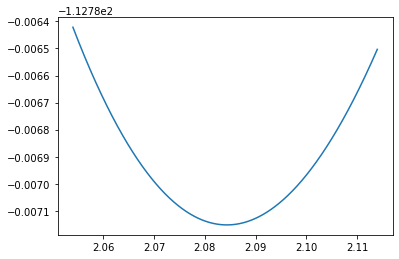

In [178]:
optimizer2at("C","O")

(2.0145599999999995, -108.99141885266681)

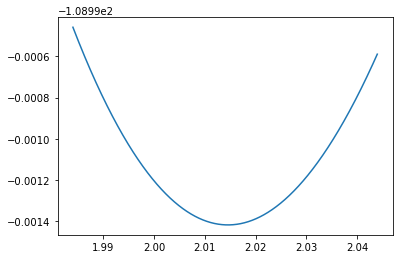

In [179]:
optimizer2at("N","N")

(2.36062, -124.16244193347859)

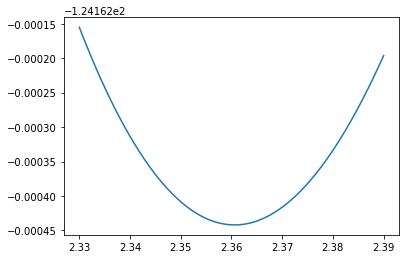

In [180]:
optimizer2at("B","F")

# GAUGE THE ERROR DUE TO BASIS SET

(2.0784399999999996, -112.69356736858131)

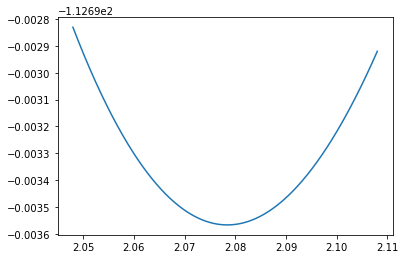

In [181]:
#CO@NN
optimizer2at("N","N",fcs=[-1,1.])

(2.0913299999999997, -112.68126140043815)

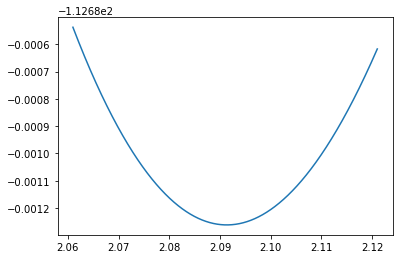

In [182]:
#CO@BF
optimizer2at("B","F",fcs=[1.,-1.])

(2.34229, -124.06570066277915)

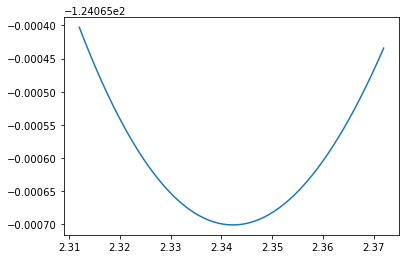

In [183]:
#BF@CO
optimizer2at("C","O",fcs=[-1,1])

(2.01042, -108.89815719958747)

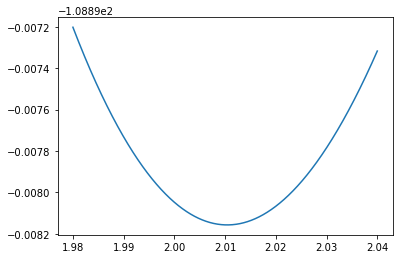

In [184]:
#NN@CO
optimizer2at("C","O",fcs=[1,-1])